# 回帰分析

## 単回帰モデル

### モデル

説明変数$x$と被説明変数$y$の$N$個のサンプルからなるデータセット$\{(y_i, x_i)\}_{i=1}^N$があるとする。

これに対する次のようなモデルを単回帰モデルという。

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$$

### パラメータの推定

**通常最小二乗法**（ordinary least squares: OLS）という方法を使うのが最も一般的である。これは実測値$y_i$と予測値$\hat{y}_i = \beta_0 + \beta_1 x_i$との**残差**（residual）$y_i - \hat{y}_i$の二乗和（residual sum of squares）

$$
RSS = \sum_{i=1}^N (y_i - \hat{y}_i)^2 = \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2
$$

を最小化するようにパラメータを推定するというもの。

この最適化は、まずRSSをパラメータ$\beta_0, \beta_1$について微分し、これがゼロとなるようなパラメータを求める。

$$
\left\{
\begin{align}
\frac{\partial RSS}{\partial \beta_0}
  &= -2 \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i) = 0
\\
\frac{\partial RSS}{\partial \beta_1}
  &= -2 \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i) x_i = 0
\end{align}\right.
$$



これを整理すると

$$
\left\{
\begin{align}
N \beta_0 + \sum_{i=1}^N \beta_1 x_i 
&= \sum_{i=1}^N y_i
\\
\sum_{i=1}^N \beta_0 x_i 
+ \sum_{i=1}^N \beta_1 x_i^2 
&= \sum_{i=1}^N y_i x_i
\end{align}
\right .
$$

となる。

:::{dropdown} 式展開メモ

ひとつめの式

$$
\frac{\partial RSS}{\partial \beta_0} = -2 \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i) = 0
$$

を整理すると

$$
2 \underbrace{ \sum_{i=1}^N \beta_0 }_{N \beta_0}
+ 2 \sum_{i=1}^N \beta_1 x_i = 2 \sum_{i=1}^N y_i
$$

整理すると

$$
N \beta_0 + \sum_{i=1}^N \beta_1 x_i = \sum_{i=1}^N y_i
$$


2つ目の式

$$
\frac{\partial RSS}{\partial \beta_1}
= -2 \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i) x_i = 0
$$

は整理すると

$$
\sum_{i=1}^N \beta_0 x_i + \sum_{i=1}^N \beta_1 x_i^2 = \sum_{i=1}^N y_i x_i
$$
:::

1行目の両辺に$\frac{1}{N} \sum_{i=1}^N x_i$を乗じた

$$
\sum_{i=1}^N \beta_0 x_i
+ \frac{1}{N} \beta_1 (\sum_{i=1}^N x_i)^2
= \frac{1}{N} (\sum_{i=1}^N y_i)(\sum_{i=1}^N x_i)
$$

を2行目から差し引くと

$$
\begin{align}
\sum_{i=1}^N \beta_1 x_i^2 
- \frac{1}{N} \beta_1 (\sum_{i=1}^N x_i)^2
&= \sum_{i=1}^N y_i x_i
- \frac{1}{N} (\sum_{i=1}^N y_i)(\sum_{i=1}^N x_i)
\end{align}
$$

両辺に$\frac{1}{N}$を乗じると

$$
\begin{align}
\frac{1}{N} \sum_{i=1}^N \beta_1 x_i^2 
- \beta_1 (\frac{1}{N} \sum_{i=1}^N x_i)^2
&= \frac{1}{N} \sum_{i=1}^N y_i x_i
- (\frac{1}{N} \sum_{i=1}^N y_i)(\frac{1}{N} \sum_{i=1}^N x_i)
\end{align}
$$

少し整理すると

$$
\begin{align}
\beta_1 \left(
\frac{1}{N} \sum_{i=1}^N x_i^2 
- (\frac{1}{N} \sum_{i=1}^N x_i)^2
\right)
&= \frac{1}{N} \sum_{i=1}^N y_i x_i
- (\frac{1}{N} \sum_{i=1}^N y_i)(\frac{1}{N} \sum_{i=1}^N x_i)
\end{align}
$$

$$
\begin{align}
\beta_1
&=
\frac
{ \frac{1}{N} \sum_{i=1}^N y_i x_i - (\frac{1}{N} \sum_{i=1}^N y_i)(\frac{1}{N} \sum_{i=1}^N x_i) }
{ \frac{1}{N} \sum_{i=1}^N x_i^2  - (\frac{1}{N} \sum_{i=1}^N x_i)^2 }
\\
&= \frac
{ \frac{1}{N} \sum_{i=1}^N y_i x_i - \bar{y}\bar{x} }
{ \frac{1}{N} \sum_{i=1}^N x_i^2  - \bar{x}^2 }
\\
&= \frac
{ Cov[x, y] }
{ Var[x] }
\end{align}
$$


:::{margin}
$$
\begin{align}
Var[x]
&= \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2
\\
&= \frac{1}{N} \sum_{i=1}^N ( x_i^2 - 2 x_i \bar{x} + \bar{x}^2 )
\\
&= \frac{1}{N} \sum_{i=1}^N x_i^2 - 2 \bar{x}^2 + \bar{x}^2
\\
&= \frac{1}{N} \sum_{i=1}^N x_i^2 - \bar{x}^2
\end{align}
$$

$$
\begin{align}
Cov[x, y]
&= \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x}) (y_i - \bar{y})
\\
&= \frac{1}{N} \sum_{i=1}^N x_i y_i - 2\bar{x}\bar{y} + \bar{x}\bar{y}
\\
&= \frac{1}{N} \sum_{i=1}^N x_i y_i - \bar{x}\bar{y}
\end{align}
$$
:::

$\beta_0$については、上記の連立方程式の1つ目の式

$$
N \beta_0 + \sum_{i=1}^N \beta_1 x_i 
= \sum_{i=1}^N y_i
$$

を$N$で割ると

$$
\begin{align}
\beta_0 
&= \frac{1}{N} \sum_{i=1}^N y_i
- \frac{1}{N} \sum_{i=1}^N \beta_1 x_i
\\
&= \bar{y}
- \beta_1 \bar{x}
\end{align}
$$


:::{info} 最尤推定量（単回帰モデル）

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
, \hspace{2em}
\beta_1 = \frac { Cov[x, y] } { Var[x] }
$$

:::

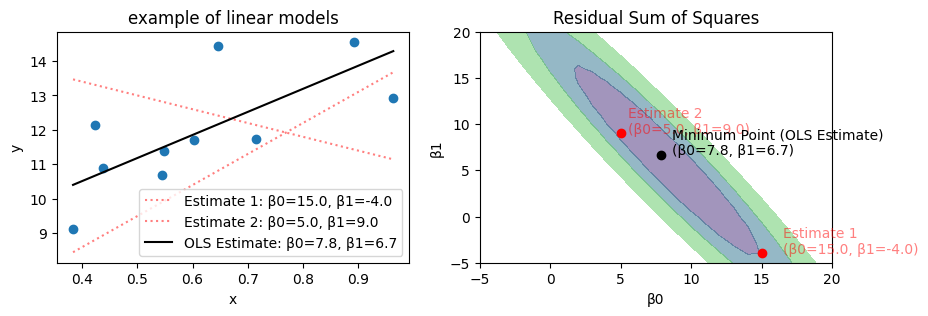

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data -------------------------
np.random.seed(0)
n = 10
beta_0 = 5
beta_1 = 10
x = np.sort(np.random.uniform(size=n))
e = np.random.normal(scale=2, size=n)
y = beta_0 + beta_1 * x + e

# calc RSS ---------------------
def rss(y_true, x, beta_0, beta_1):
    y_pred = beta_0 + beta_1 * x
    return sum((y_true - y_pred)**2)

beta_0_range = np.linspace(-5, 20, 26)
beta_1_range = np.linspace(-5, 20, 26)
Beta0, Beta1 = np.meshgrid(beta_0_range, beta_1_range)
Loss = np.array([rss(y, x, b0, b1) for b0, b1 in zip(Beta0.flatten(), Beta1.flatten())]).reshape(Beta0.shape)

# OLS estimate ------------------
beta_1_hat = np.cov(x, y)[0, 1] / np.var(x)
beta_0_hat = y.mean() - beta_1_hat * x.mean()
loss_ = rss(y, x, beta_0_hat, beta_1_hat)
color_ols = "black"

# wrong estimate
beta_wrongs = [(15, -4), (5, 9)]
color_wrong = "red"

# plot ---------------------------
fig, axes = plt.subplots(ncols=2, figsize=[10,3])

# scatter
axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y", title="example of linear models")

for i, (b0, b1) in enumerate(beta_wrongs, 1):
    y_pred = b0 + b1 * x
    axes[0].plot(x, y_pred, label=f"Estimate {i}: β0={b0:.1f}, β1={b1:.1f}", color=color_wrong, linestyle=":", alpha=.5)

y_pred = beta_0_hat + beta_1_hat * x
axes[0].plot(x, y_pred, label=f"OLS Estimate: β0={beta_0_hat:.1f}, β1={beta_1_hat:.1f}", color=color_ols)

axes[0].legend(loc="lower right")

# RSS
cs = axes[1].contourf(Beta0, Beta1, Loss, levels=[0, 50, 100, 200], alpha=0.5)
axes[1].set(xlabel="β0", ylabel="β1", title="Residual Sum of Squares")

for i, (b0, b1) in enumerate(beta_wrongs, 1):
    axes[1].scatter(b0, b1, color=color_wrong)
    axes[1].text(b0 * 1.1, b1, f"Estimate {i}\n(β0={b0:.1f}, β1={b1:.1f})", color=color_wrong, alpha=.5)

axes[1].scatter(beta_0_hat, beta_1_hat, color=color_ols)
axes[1].text(beta_0_hat * 1.1, beta_1_hat, f"Minimum Point (OLS Estimate)\n(β0={beta_0_hat:.1f}, β1={beta_1_hat:.1f})", color=color_ols)

fig.show()

# # 3d plot --------------------
# from matplotlib import cm
# fig, ax = plt.subplots(dpi=120, subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(Beta0, Beta1, Loss, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.11)
# ax.set(xlabel="beta_0", ylabel="beta_1", zlabel="Residual Sum of Squares")

# # # add a point
# # ax.scatter(beta_0_hat, beta_1_hat, loss_, color="darkorange")
# # ax.text(beta_0_hat * 0.99, beta_1_hat, loss_ * 1.1, f"Lowest point (β0={beta_0_hat:.1f}, β1={beta_1_hat:.1f})", color="darkorange")

# fig.show()

## 重回帰モデル

説明変数を複数にしたものを重回帰モデルという。

### モデル

被説明変数を$N$次元ベクトル$\boldsymbol{y}$（$N$はサンプル数）、
説明変数を$N \times (K+1)$次元ベクトル$\boldsymbol{X}$（$K$は説明変数の次元数）、
パラメータを$K+1$次元ベクトル$\boldsymbol{\beta}$、
誤差項を$N$次元ベクトル$\boldsymbol{\varepsilon}$と書くと

$$
\begin{bmatrix}
y_1 \\
\vdots \\
y_N
\end{bmatrix}
=
\begin{bmatrix}
x_{10} & \cdots & x_{1K} \\
\vdots &  & \vdots \\
x_{N0} & \cdots & x_{NK} \\
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_K
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\
\vdots \\
\varepsilon_N
\end{bmatrix}
$$

を

$$
\boldsymbol{y}
=
\boldsymbol{X}
\boldsymbol{\beta}
+
\boldsymbol{\varepsilon}
$$

と書くことができる




### パラメータの推定

残差二乗和を行列で表記すると

$$
\newcommand{ \y }{ \boldsymbol{y} }
\newcommand{ \X }{ \boldsymbol{X} }
\newcommand{ \b }{ \boldsymbol{\beta} }
\begin{align}
RSS
&= (\y - \X \b)^\top (\y - \X \b)
\\
&= \y^\top \y
 - \y^\top \X \b
 - \b^\top \X^\top \y
 - \b^\top \X^\top \X \b
\\
&= \y^\top \y
 - 2 \y^\top \X \b
 + \b^\top \X^\top \X \b
\end{align}
$$

:::{margin}
$\y^\top \X \b, \b^\top \X^\top \y$はともにスカラーになるので

$$
\y^\top \X \b = \b^\top \X^\top \y
$$
:::

これを微分すると

$$
\frac{\partial RSS}{\partial \b}
= - 2 \X^\top \y + 2 (\X^\top \X) \b
$$

となるため、これが0となるような$\b$は

$$
\b = (\X^\top \X)^{-1} \X^\top \y
$$

となる

## 対数変換

目的変数や説明変数を対数変換すると、推定結果の解釈が変わる


| モデル                                | 係数の解釈                                                 |
| ------------------------------------- | ---------------------------------------------------------- |
| $Y = \beta_0 + \beta_1 X$             | 「$X$が1単位増加すると，$Y$が$\beta_1$単位増加する」       |
| $Y = \beta_0 + \beta_1 \ln(X)$       | 「$X$が1%増加すると，$Y$が$\beta_1 / 100$単位増加する」 |
| $\ln(Y) = \beta_0 + \beta_1 X$       | 「$X$が1単位増加すると，$Y$が$(\beta_1 \times 100)$%増加する」 |
| $\ln(Y) = \beta_0 + \beta_1 \ln(X)$ | 「$X$が1%増加すると，$Y$が$\beta_1$%増加する」             |


次のようなデータを使って実際にモデルをあてはめつつ確認していく

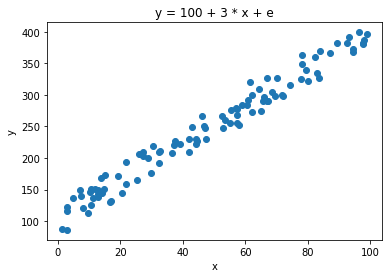

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


# 真のデータ生成過程
n = 100
np.random.seed(0)
x = np.random.uniform(1, 100, size=n)
x = np.sort(x)
e = np.random.normal(loc=0, scale=15, size=n)
beta0 = 100
beta1 = 3
y = beta0 + beta1 * x + e

df = pd.DataFrame({"y": y, "x": x})
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"y = {beta0} + {beta1} * x + e")
plt.show()



#### (1) $Y = \beta_0 + \beta_1 X$

Xを1単位増加させたモデルとそうでないモデルで差分をとってみると

$$
\begin{align}
Y_1 &= \beta_0 + \beta_1 X\\
Y_2 &= \beta_0 + \beta_1 (X + 1)\\
    &= \beta_0 + \beta_1 X + \beta_1\\
Y_2 - Y_1 &= \beta_1
\end{align}
$$

であるため、「$X$が1単位増加すると、$Y$が$\beta_1$単位増加する」という解釈になる



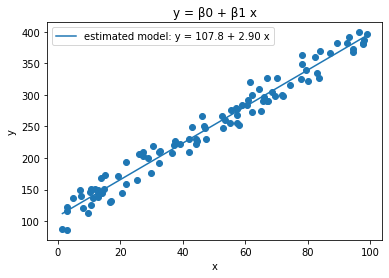

In [2]:
model = smf.ols('y ~ x', data=df).fit()
beta = model.params.to_list()

y_pred = model.predict(df[["x"]])

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(xlabel="x", ylabel="y", title="y = β0 + β1 x")
ax.plot(x, y_pred, label=f"estimated model: y = {beta[0]:.1f} + {beta[1]:.2f} x")
ax.legend()
fig.show()


#### (2) $Y = \beta_0 + \beta_1 \ln(X)$

$$
\begin{align}
Y_1 &= \beta_0 + \beta_1 \ln(X)\\
Y_2 &= \beta_0 + \beta_1 \ln(1.01X)\\
    &= \beta_0 + \beta_1 \ln (X) + \beta_1 \ln(1.01) \\
Y_2 - Y_1 &= \beta_1 \ln(1.01)
\end{align}
$$

$\ln(1.01) \approx 0.01$なので

$$
Y_2 - Y_1 = \beta_1 \ln(1.01) \approx 0.01\beta_1
$$

「$X$が1%増加すると、$Y$が$\beta_1 / 100$単位増加する」となる

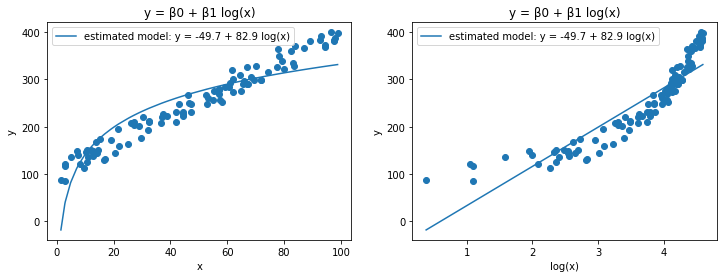

In [3]:
model = smf.ols('y ~ np.log(x)', data=df).fit()
beta = model.params.to_list()
y_pred = model.predict(df[["x"]])

fig, axes = plt.subplots(ncols=2, figsize=[12, 4])
axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y", title="y = β0 + β1 log(x)")
axes[0].plot(x, y_pred, label=f"estimated model: y = {beta[0]:.1f} + {beta[1]:.3g} log(x)")
axes[0].legend()

axes[1].scatter(np.log(x), y)
axes[1].set(xlabel="log(x)", ylabel="y", title="y = β0 + β1 log(x)")
axes[1].plot(np.log(x), y_pred, label=f"estimated model: y = {beta[0]:.1f} + {beta[1]:.3g} log(x)")
axes[1].legend()

fig.show()

In [4]:
np.log(1.01)

0.009950330853168092

In [5]:
x0 = 50
y1 = beta[0] + beta[1] * np.log(x0)
y2 = beta[0] + beta[1] * np.log(x0 * 1.01)
print(f"xが1%増加したときのyの増分 = {y2 - y1:.3f}")

xが1%増加したときのyの増分 = 0.825


$\ln(1.01) \approx 0.01$の近似誤差が多少あるが、おおむね「$X$が1%増加すると、$Y$が$\beta_1 / 100$単位増加する」という関係になる。

#### (3) $\ln(Y) = \beta_0 + \beta_1 X$


$$
\begin{align}
Y_1 &= \exp(\beta_0 + \beta_1 X)\\
Y_2 &= \exp(\beta_0 + \beta_1 (X + 1))\\
    &= \exp(\beta_0 + \beta_1 X + \beta_1)
\end{align}
$$

$X$を1単位増やしたときの$Y$の変化率は

$$
\begin{align}
\frac{Y_2 - Y_1}{Y_1}
= \frac{Y_2}{Y_1} - 1
&= \frac{\exp(\beta_0) \exp(\beta_1 X) \exp(\beta_1)}
{\exp(\beta_0) \exp(\beta_1 X)} - 1\\
&= \exp(\beta_1) - 1\\
\end{align}
$$

$X$が1単位増えると、$Y$は$\exp(\beta_1) - 1 \approx \beta_1$％増える


「$X$が1単位増加すると、$Y$が$(\beta_1 \times 100)$%増加する」


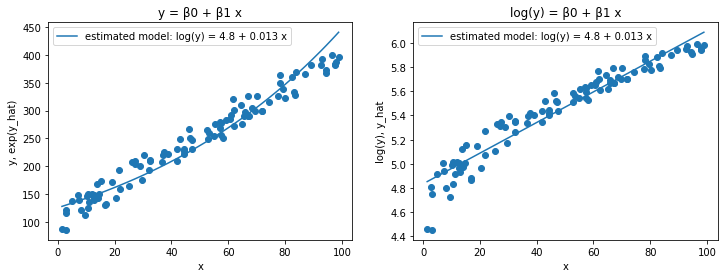

In [6]:
model = smf.ols('np.log(y) ~ x', data=df).fit()
beta = model.params.to_list()
y_pred = model.predict(df[["x"]])

fig, axes = plt.subplots(ncols=2, figsize=[12, 4])

axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y, exp(y_hat)", title="y = β0 + β1 x")
axes[0].plot(x, np.exp(y_pred), label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} x")
axes[0].legend()

axes[1].scatter(x, np.log(y))
axes[1].set(xlabel="x", ylabel="log(y), y_hat", title="log(y) = β0 + β1 x")
axes[1].plot(x, y_pred, label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} x")
axes[1].legend()

fig.show()

In [7]:
x0 = 50
y1 = beta[0] + beta[1] * x0
y2 = beta[0] + beta[1] * (x0 + 1)
print(f"xが1単位増加したときのyの増分 = {y2 - y1:.3f}")

xが1単位増加したときのyの増分 = 0.013




#### (4) $\ln(Y) = \beta_0 + \beta_1 \ln(X)$

「$X$が1%増加すると、$Y$が$\beta_1$%増加する」

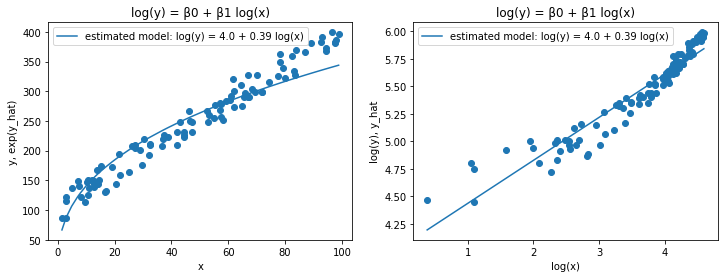

In [23]:
model = smf.ols('np.log(y) ~ np.log(x)', data=df).fit()
beta = model.params.to_list()
y_pred = model.predict(df[["x"]])

fig, axes = plt.subplots(ncols=2, figsize=[12, 4])

axes[0].scatter(x, y)
axes[0].set(xlabel="x", ylabel="y, exp(y_hat)", title="log(y) = β0 + β1 log(x)")
axes[0].plot(x, np.exp(y_pred), label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} log(x)")
axes[0].legend()

axes[1].scatter(np.log(x), np.log(y))
axes[1].set(xlabel="log(x)", ylabel="log(y), y_hat", title="log(y) = β0 + β1 log(x)")
axes[1].plot(np.log(x), y_pred, label=f"estimated model: log(y) = {beta[0]:.1f} + {beta[1]:.2g} log(x)")
axes[1].legend()

fig.show()

In [20]:
x0 = 50
y1 = beta[0] + beta[1] * np.log(x0)
y2 = beta[0] + beta[1] * np.log(x0 + 1)
print(f"xが1%増加したときのyの増分 = {y2 - y1:.3f}")

xが1%増加したときのyの増分 = 0.008


In [16]:
y1 = model.predict(pd.DataFrame([{"x": x0}])).to_numpy()[0]
y2 = model.predict(pd.DataFrame([{"x": x0 + 1}])).to_numpy()[0]
print(f"xが1単位増加したときのyの増分 = {y2 - y1:.3f}")

xが1単位増加したときのyの増分 = 0.008
